<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/TJC_PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prinicep 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
mpl.use('Agg')
%matplotlib inline
plt.style.use('fivethirtyeight')
from ipywidgets import interact
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

In [2]:
# Load the faces datasets
data_dic= fetch_olivetti_faces()
data=data_dic["images"] 
ids=data_dic["target"]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


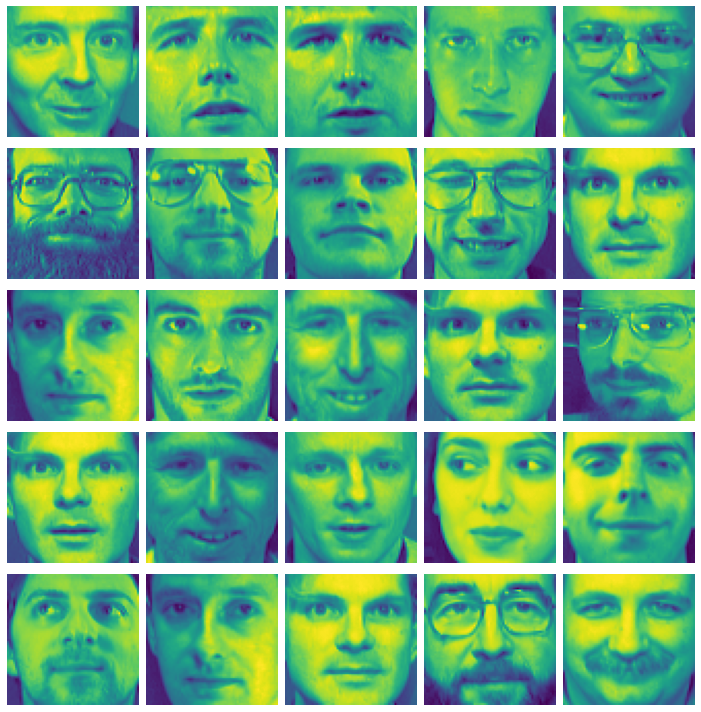

In [3]:
def PlotImages(data,ncols=5):
  N,w,h=data.shape
  aspect_ratio = w /h
  nrows=N//ncols 
  if nrows % 2 ==0:
    nrows+=1
  fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(2 * ncols * aspect_ratio, 2 * nrows))
  for idx in range(0,N):
    ax= axs[idx// ncols][idx % ncols]
    ax.imshow(data[idx])
    ax.axis(False)
  plt.tight_layout()
PlotImages(np.array(random.choices(data,k=25)))

# PCA Functions 

In [4]:
def normalize(X):
  mu=np.mean(X, axis=0) #Mean 
  std=np.std(X,axis=0) #Standard deviataion 
  #Deal with std vales of zero
  std_filled = std.copy()
  std_filled[std==0] = 1. 
  Xbar = ((X-mu)/std_filled) #Normalized so mean is zero 
  return Xbar,mu,std


def getEigen(S):
  eigvals,eigvecs= np.linalg.eig(S)
  k=np.argsort(eigvals[::-1]) #Sort eigenvals in terms of max index  
  return eigvals[k], eigvecs[:,k] #Return in max index order 

def projection_matrix(B):
  return (B @ np.linalg.inv(B.T @ B) @ B.T)

def numpy_PCA(X,n_components):
  
  S= np.dot(X.T,X)/len(X) #CCovariance matrix 

 
  eig_vals, eig_vecs =getEigen(S) #Eigenvalues and vectors 
  eig_vals, eig_vecs = eig_vals[:n_components], eig_vecs[:, :n_components] #wanted components 

  # recontruct the matrix to the lower dimension form using construction matrix 
  B = np.real(eig_vecs)
  reconst = (projection_matrix(B) @ X.T)
  return reconst.T

In [6]:
Xbar,mu,std= normalize(data/255)
dim=Xbar.shape
n_components=2
pca_output=numpy_PCA(Xbar.reshape(-1,dim[1]*dim[2]),n_components)
print(pca_output.shape)

(400, 4096)


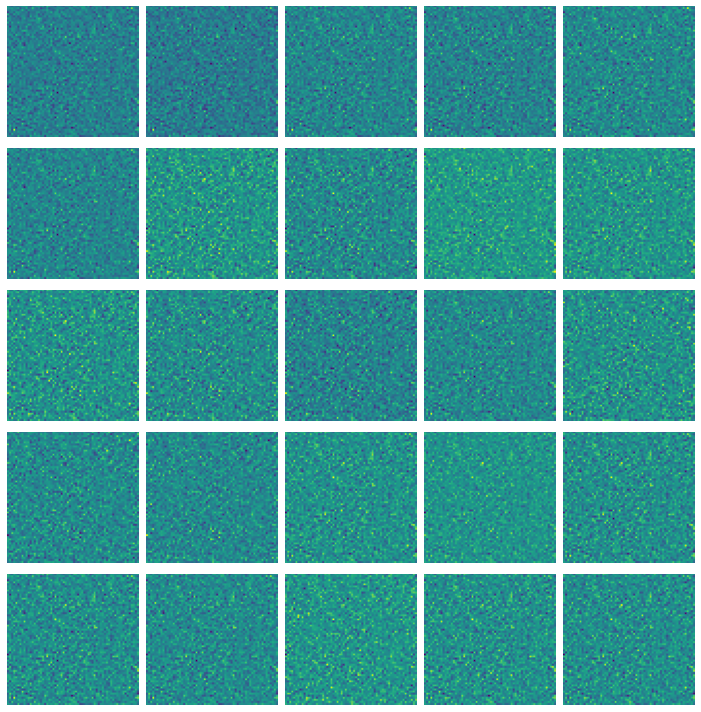

In [7]:
pca_output=pca_output.reshape(dim)
PlotImages(np.array(random.choices(pca_output,k=25)))

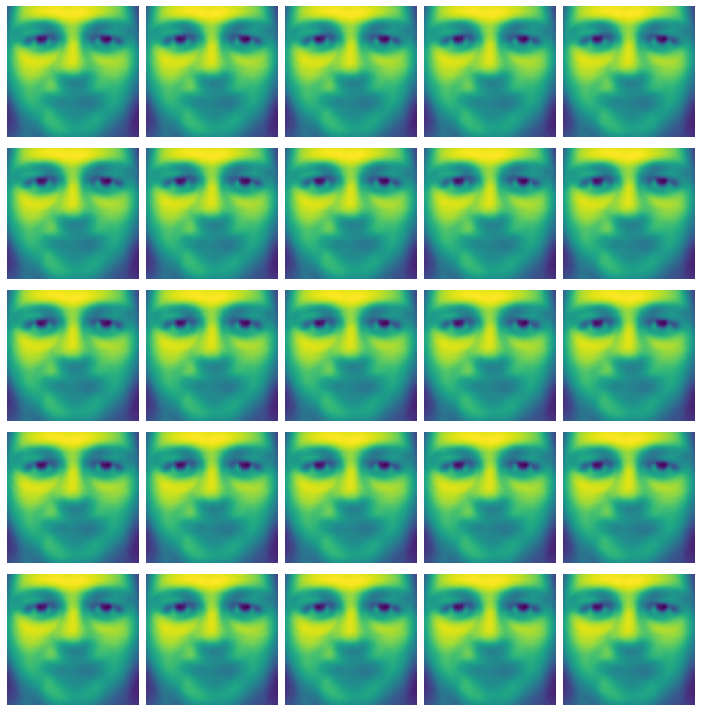

In [8]:
PlotImages(np.array(random.choices(pca_output* std + mu,k=25)))

In [18]:
#Data size reduction 
from sys import getsizeof
print("Normlaized data ")
print(f"Bytes: {getsizeof(Xbar)}. Shape {Xbar.shape}")
print(f"PCA output {n_components} components")
print(f"Bytes: {getsizeof(pca_output)}. Shape {pca_output.shape}")

Normlaized data 
Bytes: 6553728. Shape (400, 64, 64)
PCA output 2 components
Bytes: 128. Shape (400, 64, 64)


In [19]:
6553728//128

51201

# SKLearn

#Multi component test 

In [ ]:
#data=data_dic["images"] 
test_data=data[ids==np.random.choice(ids)]
dims=test_data.shape
print(dims) #(10, 64, 64)
Xbar,mu,std= normalize(test_data.reshape(-1,dims[1]*dims[2]) /255) #Redcue the x,y axis to 1 axis 

(10, 64, 64)


In [ ]:
def mse(predict,actual): #Mean squared error 
  return np.square(predict - actual).sum(axis=1).mean()

loss=[]
reconstruction=[]
for num_components in range(1,10): 
  reconst=numpy_PCA(Xbar,num_components)
  reconstruction.append(reconst)
  error=mse(reconst,Xbar)
  loss.append((num_components,error))
  print(f"compnent n:{ num_components}/100")


compnent n:1/100
compnent n:2/100
compnent n:3/100
compnent n:4/100
compnent n:5/100
compnent n:6/100
compnent n:7/100
compnent n:8/100
compnent n:9/100


In [ ]:
reconstructions = np.asarray(reconstruction)
reconstructions = reconstructions * std + mu # "unnormalize" the reconstructed image
loss = np.asarray(loss)

In [ ]:
loss

array([[2.000e+00, 4.096e+03],
       [4.000e+00, 4.096e+03],
       [6.000e+00, 4.096e+03],
       [8.000e+00, 4.096e+03],
       [1.000e+01, 4.096e+03],
       [1.200e+01, 4.096e+03],
       [1.400e+01, 4.096e+03],
       [1.600e+01, 4.096e+03],
       [1.800e+01, 4.096e+03],
       [2.000e+01, 4.096e+03],
       [2.200e+01, 4.096e+03],
       [2.400e+01, 4.096e+03],
       [2.600e+01, 4.096e+03],
       [2.800e+01, 4.096e+03],
       [3.000e+01, 4.096e+03],
       [3.200e+01, 4.096e+03],
       [3.400e+01, 4.096e+03],
       [3.600e+01, 4.096e+03],
       [3.800e+01, 4.096e+03],
       [4.000e+01, 4.096e+03],
       [4.200e+01, 4.096e+03],
       [4.400e+01, 4.096e+03],
       [4.600e+01, 4.096e+03],
       [4.800e+01, 4.096e+03],
       [5.000e+01, 4.096e+03],
       [5.200e+01, 4.096e+03],
       [5.400e+01, 4.096e+03],
       [5.600e+01, 4.096e+03],
       [5.800e+01, 4.096e+03],
       [6.000e+01, 4.096e+03],
       [6.200e+01, 4.096e+03],
       [6.400e+01, 4.096e+03],
       [

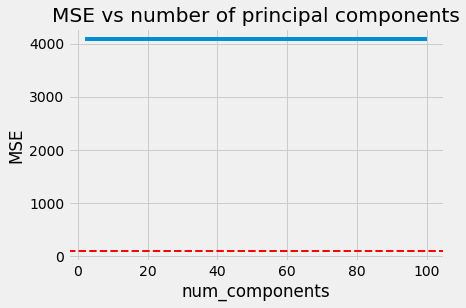

In [ ]:
import pandas as pd
# create a table showing the number of principal components and MSE
df=pd.DataFrame(loss,columns=["n_comp","loss"])# .head()
df.index=df["n_comp"]
fig, ax = plt.subplots()
df["loss"].plot(ax=ax)
ax.axhline(100, linestyle='--', color='r', linewidth=2)
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');

In [ ]:
reconstructions.shape

(50, 10, 4096)

In [ ]:
@interact(i=(0, 10))
def show_pca_digits(i=1):
    """Show the i th digit and its reconstruction"""
    plt.figure(figsize=(4,4))
    actual_sample = test_data[i].reshape(dims[1],dims[2])
    reconst_sample = (reconst[i, :] * std + mu).reshape(dims[1],dims[2])
    plt.imshow(np.hstack([actual_sample, reconst_sample]), cmap='gray')
    plt.show()